# ML in Python- Gradient Descent Optimization

### 1) Importing Libraries and Setting Path

In [108]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [109]:
#Create a path to where your data is stored.
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 1\12-25- ClimateWins Project\Data Sets'

In [110]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-scaled.csv'))
climate

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


### 2) Data Cleaning for Exercise

In [111]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [112]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,19600102,1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,19600103,1,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,19600104,1,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,19600105,1,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,20221028,10,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,20221029,10,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,20221030,10,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


In [113]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

In [114]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

### 3) Optimization Data

In [115]:
#Reduce your dataset to a single year
dfyear19 = df[df['DATE'].astype(str).str.contains('2019')] #<-----INSERT YEAR HERE
dfyear19

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
21550,20190101,1,-0.732333,-1.232510,-1.052110,-0.367511,-0.562362,-0.352125,-0.595665,-0.005705,-1.031772,-0.592185,-1.123071,-0.617629,-0.210845,-0.000746,-0.533833,-0.391072,-0.712262,-0.007287
21551,20190102,1,-0.963204,-1.107669,-0.993293,-0.731423,-0.989434,-0.786929,-1.084860,-0.005705,-1.043881,-1.042277,-1.203946,-1.082622,-0.659834,-0.000746,-1.382089,-1.037982,-0.916201,-0.007287
21552,20190103,1,-1.452108,-1.527588,-1.475592,-0.952934,-1.048340,-0.953178,-1.102331,-0.005705,-1.104426,-1.042277,-1.028718,-1.371671,-0.659834,-0.000746,-2.508221,-1.212150,-1.324080,-0.007287
21553,20190104,1,-1.424946,-1.856713,-1.534409,-0.778890,-1.151427,-0.978754,-1.434286,-0.005705,-1.395042,-1.147298,-1.217425,-1.271132,-0.502081,-0.000746,-2.230344,-0.577681,-1.449581,-0.007287
21554,20190105,1,-1.126172,-1.731872,-1.216797,-0.478267,-0.709628,-0.607892,-1.259573,-0.005705,-1.479805,-0.757219,-1.284820,-1.132891,-0.380732,-0.000746,-1.528340,-0.838933,-1.433893,-0.007287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,-0.487881,-1.084971,-0.863895,-1.063690,-0.945254,-0.595104,-0.648078,-0.005705,-0.934900,-0.697206,-0.813052,-0.667898,-1.375790,-0.000746,-0.884835,-1.013101,-0.084757,-0.007287
21911,20191228,12,-0.908881,-1.209812,-1.110927,-1.601646,-1.490139,-0.722987,-0.543251,-0.005705,-1.213407,-1.237316,-0.907406,-1.145458,-0.926801,-0.000746,-1.294338,-1.174829,-0.461260,-0.007287
21912,20191229,12,-1.520011,-1.368700,-1.287378,-1.395957,-1.225060,-0.799717,-0.438423,-0.005705,-1.467696,-1.357341,-0.961322,-1.333969,-0.247249,-0.000746,-1.440589,-0.565240,-1.277017,-0.007287
21913,20191230,12,-1.343462,-1.607032,-1.299141,-0.858001,-0.901074,-0.556739,-0.822791,-0.005705,-1.576677,-0.772222,-1.069155,-1.132891,-0.113766,-0.000746,-0.738584,0.094110,-1.449581,-0.007287


In [116]:
dfyear19.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,2.019067e+07,6.526027,0.170502,0.282088,0.269420,0.184273,0.169048,0.244828,0.172018,-5.705221e-03,0.224877,0.194509,0.163277,0.250347,0.105426,-0.000746,0.190690,0.156688,0.244511,-7.287352e-03
std,3.454755e+02,3.452584,0.976797,0.942994,0.963701,0.942226,0.986419,0.910151,0.975865,8.685524e-19,0.960609,0.968814,1.025720,0.938443,0.914662,0.000000,1.031892,0.920464,0.997437,8.685524e-19
min,2.019010e+07,1.000000,-1.669398,-1.924808,-1.699097,-1.997201,-2.093931,-2.027399,-2.028309,-5.705221e-03,-1.782530,-2.047481,-1.743109,-1.685856,-2.067477,-0.000746,-2.508221,-1.747095,-1.731958,-7.287352e-03
25%,2.019040e+07,4.000000,-0.555784,-0.404022,-0.463939,-0.525734,-0.577088,-0.480009,-0.595665,-5.705221e-03,-0.474758,-0.562179,-0.718699,-0.479388,-0.587025,-0.000746,-0.533833,-0.540359,-0.476948,-7.287352e-03
50%,2.019070e+07,7.000000,0.096087,0.333672,0.206575,0.091333,0.026704,0.121044,0.068244,-5.705221e-03,0.154910,0.127961,-0.044744,0.199251,0.007583,-0.000746,0.080421,0.031908,0.087807,-7.287352e-03
75%,2.019100e+07,10.000000,0.897346,1.003272,1.053540,0.914089,0.895575,1.016229,0.976750,-5.705221e-03,1.075195,0.908120,0.912271,0.953293,0.941966,-0.000746,1.104177,0.927629,0.934939,-7.287352e-03
max,2.019123e+07,12.000000,2.540605,2.070092,2.100483,2.970979,3.016209,2.282276,3.073302,-5.705221e-03,2.225550,3.113568,2.354534,2.360839,2.288935,-0.000746,2.464311,2.271212,3.037082,-7.287352e-03


In [117]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear19.drop(['DATE','MONTH'], axis=1)

In [118]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [119]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
360,3.61
361,3.62
362,3.63
363,3.64


In [120]:
n_rows = dfyear19.shape[0]
n_rows

365

In [121]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear19['OSLO_temp_mean'].to_numpy().reshape(n_rows,1) #<----OSLO CHOSEN HERE

In [122]:
X.shape, y.shape

((365, 2), (365, 1))

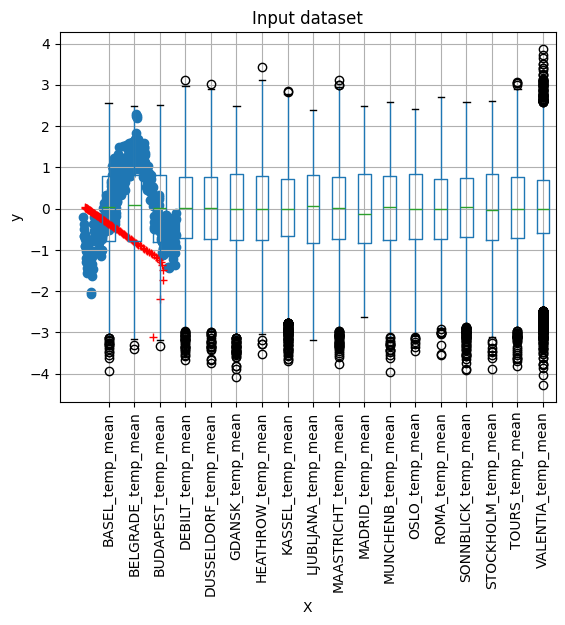

In [123]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear19['OSLO_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [124]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear19['OSLO_temp_mean'].min()

np.float64(-2.0674769303985405)

In [125]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear19['OSLO_temp_mean'].max()

np.float64(2.2889350784227216)

In [126]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [127]:
compute_cost(X,y)

array([0.42271474])

In [128]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [129]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 56.3 ms


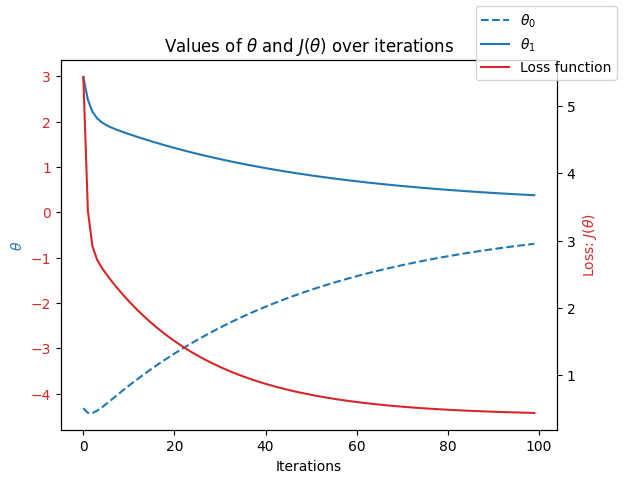

In [130]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [131]:
# Create a grid of theta values to compute the loss surface
theta0_vals = np.linspace(-5, 5, 50)
theta1_vals = np.linspace(-5, 5, 50)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_test = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = compute_cost(X, y, theta_test)


C:\Users\wjzak\AppData\Local\Temp\ipykernel_25704\3935648326.py:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [132]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### MADRID 2019

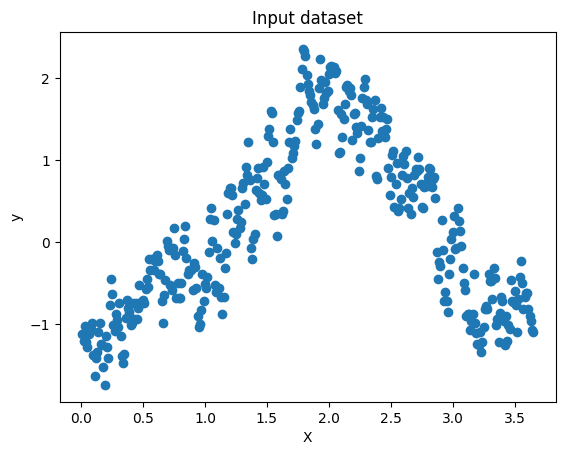

In [133]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear19['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [134]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [135]:
compute_cost(X,y)

array([0.42271474])

In [136]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [137]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 58 ms


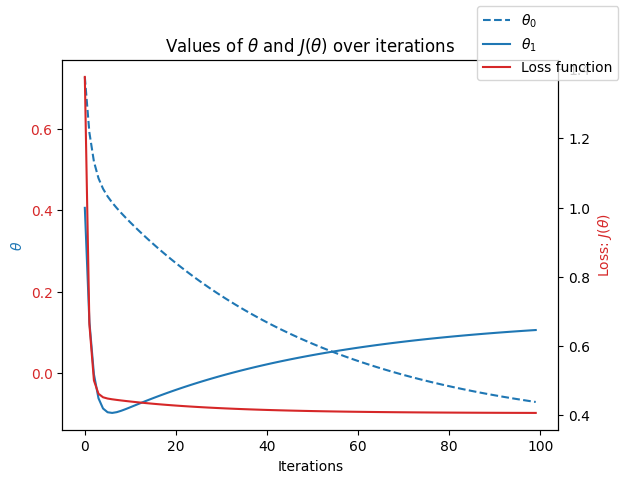

In [138]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [139]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [140]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [141]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[2],[-1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### ROMA 2019

In [142]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear19['ROMA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [143]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [144]:
compute_cost(X,y)

array([0.42271474])

In [145]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [146]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[2],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 56.6 ms


In [147]:
theta

array([[ 0.28505181],
       [-0.04802431]])

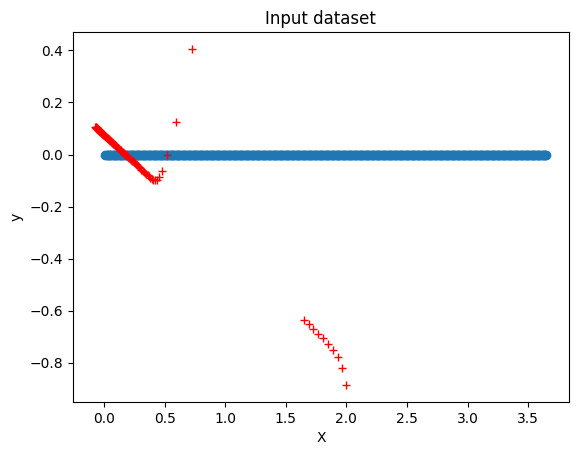

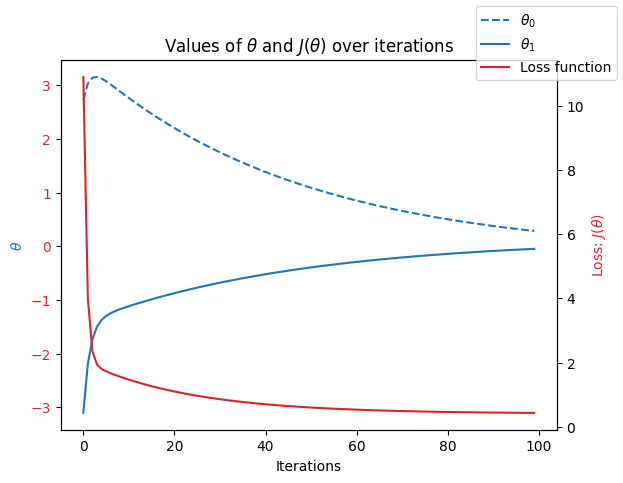

In [148]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [149]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.66 s
Wall time: 1.85 s


In [150]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [151]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [152]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

Additional Theta Analysis and Loss Fucntion Work

In [153]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [154]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[2],[-5]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [155]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [156]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

### 4) Optimization 1960 Data

In [157]:
#Reduce your dataset to a single year
dfyear60 = df[df['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
dfyear60

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,19600102,1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,19600103,1,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,19600104,1,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,19600105,1,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,19601227,12,-1.289140,-1.277907,-1.440302,-1.126979,-0.974707,-0.940389,-1.469228,-0.891697,-1.721985,-0.997267,-1.069155,-1.120324,-0.417137,-1.785596,-0.914086,-0.403513,-1.104453,-1.629564
362,19601228,12,-1.289140,-1.255208,-1.416775,-1.522534,-1.283966,-0.978754,-1.469228,-1.054129,-1.479805,-1.342338,-1.338737,-1.321402,-0.550620,-1.381479,-1.279713,-0.565240,-1.653520,-1.509396
363,19601229,12,-1.207656,-1.221161,-1.122690,-1.570001,-1.313420,-1.234521,-1.434286,-1.305160,-1.443478,-1.342338,-0.920885,-1.459643,-0.708373,-1.819273,-1.659965,-0.615003,-1.073078,-0.998679
364,19601230,12,-1.547172,-1.243859,-1.169744,-1.316845,-1.372326,-0.889236,-1.084860,-1.393759,-1.273952,-1.177304,-0.772615,-1.547614,-0.829722,-1.549861,-1.674591,-0.726968,-0.900514,-1.239016


In [158]:
dfyear60.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1.960067e+07,6.513661,-0.102317,-0.032384,-0.063919,-0.052666,-0.034416,-0.067706,-0.103366,0.026208,-0.074499,-0.063840,-0.130480,-0.101680,-0.078422,0.092554,-0.175958,-0.092804,-0.059940,-0.057276
std,3.457653e+02,3.455958,0.935826,0.920271,0.946637,0.910451,0.919531,0.978767,0.919195,0.964448,0.906193,0.902235,0.979590,0.938523,0.998018,1.002362,0.884235,0.988702,0.944029,1.127911
min,1.960010e+07,1.000000,-3.190431,-2.401472,-2.416664,-2.645913,-2.874442,-2.922584,-2.307849,-3.446307,-2.714923,-3.247725,-2.322710,-3.017997,-2.249500,-2.408610,-3.502727,-2.356684,-3.112470,-2.951420
25%,1.960040e+07,4.000000,-0.756099,-0.594120,-0.675681,-0.668134,-0.661766,-0.825294,-0.840262,-0.666507,-0.738129,-0.712209,-0.890557,-0.777863,-0.738711,-0.653227,-0.764178,-0.798501,-0.692653,-0.848468
50%,1.960070e+07,7.000000,-0.053300,0.055618,-0.005167,-0.011511,-0.002750,-0.096358,-0.071526,0.082894,-0.002507,0.052946,-0.294107,-0.001827,-0.168373,-0.009165,-0.124331,-0.179582,0.032900,-0.037330
75%,1.960098e+07,9.750000,0.649499,0.662798,0.744750,0.692578,0.715174,0.757265,0.714681,0.802762,0.699815,0.649317,0.787590,0.626541,0.869157,1.110576,0.475298,0.877867,0.683937,0.893978
max,1.960123e+07,12.000000,1.820830,1.843109,1.806397,1.847601,1.970619,1.834684,1.745486,2.002543,1.668536,1.688278,1.936682,1.858144,1.985564,1.952486,1.967058,1.686504,1.938947,2.606381


In [159]:
n_rows60 = dfyear60.shape[0]
n_rows60

366

In [160]:

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index60 = pd.DataFrame(data = i, columns = ['index'])
index60

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
361,3.62
362,3.63
363,3.64
364,3.65


In [161]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear60 = dfyear60.drop(['DATE','MONTH'], axis=1)

In [162]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear60.values)])
fig.update_layout(title='Temperatures over time (1960)', autosize=False,
                  width=600, height=600)
fig.show()

In [163]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index60.to_numpy().reshape(n_rows60,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows60,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear60['OSLO_temp_mean'].to_numpy().reshape(n_rows60,1) #<----OSLO CHOSEN HERE

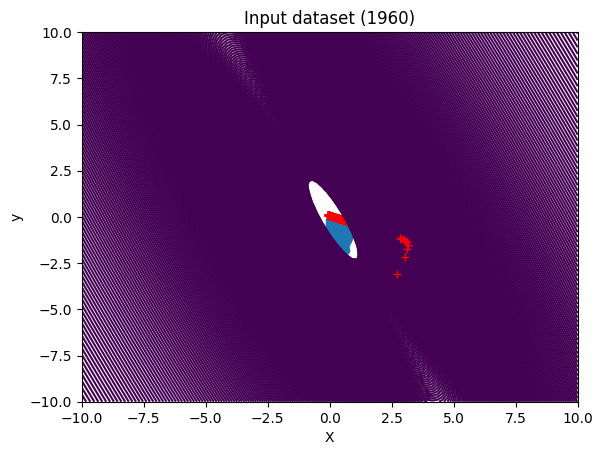

In [164]:
#Look at one year of temperature data over time
plt.scatter(x=index60['index'], y=dfyear60['OSLO_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset (1960)');
plt.show()

In [165]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 58.6 ms


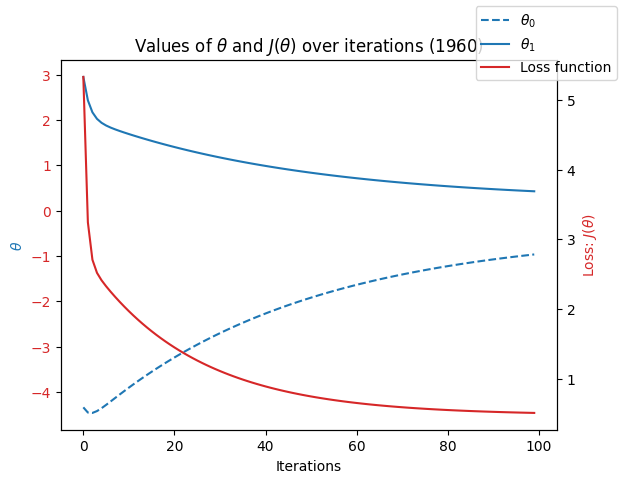

In [166]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations (1960)')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [167]:
compute_cost(X,y)

array([0.49973378])

In [168]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [169]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 58.8 ms

Wall time: 58.8 ms


In [170]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [171]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [172]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[0],[-1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 5) Optimization 1990 Data

In [173]:
#Reduce your dataset to a single year
dfyear90 = df[df['DATE'].astype(str).str.contains('1990')] #<-----INSERT YEAR HERE
dfyear90

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
10958,19900101,1,-1.696559,-1.584333,-1.369721,-1.506712,-1.490139,-1.298463,-1.172216,-1.541424,-1.479805,-1.447359,-0.974801,-1.811529,-1.594218,-1.937140,-0.460708,-1.274353,-1.528019,-1.148890
10959,19900102,1,-1.655817,-1.538937,-1.428538,-1.427601,-1.269240,-1.081061,-1.049918,-1.452825,-1.528241,-1.342338,-1.136550,-1.522480,-1.497139,-1.566700,-0.782460,-1.448521,-1.292705,-1.028721
10960,19900103,1,-1.710140,-1.527588,-1.440302,-1.301023,-1.460686,-1.196156,-1.259573,-1.570958,-1.382933,-1.387347,-1.069155,-1.359104,-1.703431,-1.600376,-0.972586,-1.361437,-1.261329,-0.878510
10961,19900104,1,-1.506430,-1.788618,-1.616753,-1.538357,-1.401779,-1.515865,-1.032446,-1.570958,-1.516132,-1.642398,-1.136550,-1.710990,-1.023880,-1.583538,-1.001836,-0.938458,-1.386830,-1.269058
10962,19900105,1,-1.411366,-2.083696,-1.687333,-1.063690,-1.107247,-1.592595,-0.805320,-1.408526,-1.794639,-1.237316,-1.082634,-1.447075,-0.878261,-1.886626,-0.870210,-0.963339,-1.135828,-0.397835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,19901227,12,-0.515042,-1.005527,-1.299141,-0.589023,-0.842167,-0.786929,-0.945090,-0.832631,-1.177080,-0.772222,-0.840010,-0.491955,-0.659834,-1.246774,-0.943336,-0.453275,-0.712262,-0.998679
11319,19901228,12,-0.895301,-1.107669,-1.169744,-0.810534,-0.753808,-0.825294,-0.648078,-1.024596,-1.092317,-0.862240,-0.907406,-1.057487,-0.805452,-1.263612,-1.338213,-0.639884,-0.759325,-0.788384
11320,19901229,12,-0.012558,-1.289256,-1.463829,-0.240934,-0.400369,-0.850871,-0.648078,-0.463468,-1.080208,-0.247115,-0.853490,-0.077232,-0.684104,-1.566700,-0.723959,-0.565240,-0.100445,-1.899944
11321,19901230,12,0.218313,-0.937432,-1.263851,-0.604845,-0.503455,-0.659045,-0.857734,-0.611133,-0.801701,-0.532173,-0.893927,-0.240607,-1.145228,-0.960524,-0.007330,-0.602562,-0.382822,-1.779775


In [174]:
dfyear90.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1.990067e+07,6.526027,0.070861,0.043663,0.027964,0.139493,0.146131,0.150405,0.152728,0.104417,-0.001047,0.095736,0.063753,0.003406,0.144391,0.038743,0.037507,0.131603,0.137621,0.135022
std,3.454755e+02,3.452584,0.901173,0.898311,0.906770,0.839960,0.882042,0.756431,0.942064,0.930487,0.911890,0.885778,1.023386,0.923807,0.825958,1.130786,0.866875,0.789326,0.980101,1.096645
min,1.990010e+07,1.000000,-1.818785,-2.537662,-2.357847,-1.633290,-1.607952,-1.592595,-1.888539,-1.748156,-2.266890,-1.747420,-1.743109,-2.490168,-1.933994,-2.088684,-2.435095,-1.572927,-2.139837,-2.290492
25%,1.990040e+07,4.000000,-0.582946,-0.631005,-0.640390,-0.525734,-0.532908,-0.518374,-0.630607,-0.625900,-0.704829,-0.607188,-0.799573,-0.680466,-0.477811,-0.893171,-0.519208,-0.552800,-0.649512,-0.788384
50%,1.990070e+07,7.000000,0.109668,0.152086,0.077177,0.154622,0.173970,0.172198,0.138129,0.082894,-0.002507,0.097955,-0.112140,0.073577,0.080392,-0.051261,0.109671,0.081670,0.150558,0.142923
75%,1.990100e+07,10.000000,0.734378,0.708194,0.724164,0.708400,0.763035,0.786039,0.802037,0.762154,0.663488,0.683074,0.993146,0.701946,0.857022,1.026385,0.665425,0.828105,0.856501,0.863935
max,1.990123e+07,12.000000,1.997379,1.740967,1.876978,2.417201,2.765857,1.898625,2.828705,2.475072,1.801735,2.603464,2.165827,1.946116,1.767136,2.019839,1.879307,1.985078,2.644891,2.966887


In [175]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear90 = dfyear90.drop(['DATE','MONTH'], axis=1)

In [176]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear90.values)])
fig.update_layout(title='Temperatures over time (1990)', autosize=False,
                  width=600, height=600)
fig.show()

In [177]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index90 = pd.DataFrame(data = i, columns = ['index'])
index90

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
360,3.61
361,3.62
362,3.63
363,3.64


In [178]:
n_rows90 = dfyear90.shape[0]
n_rows90

365

In [179]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index90.to_numpy().reshape(n_rows90,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows90,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear90['OSLO_temp_mean'].to_numpy().reshape(n_rows90,1) #<----OSLO CHOSEN HERE

In [180]:
X.shape, y.shape

((365, 2), (365, 1))

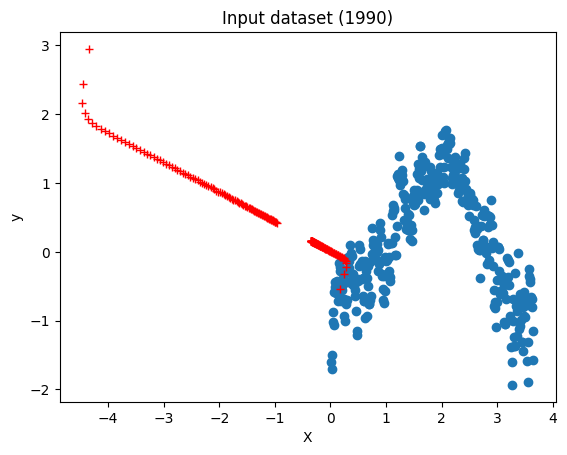

In [181]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear90['OSLO_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset (1990)');
plt.show()

In [182]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=200 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 109 ms
Wall time: 120 ms


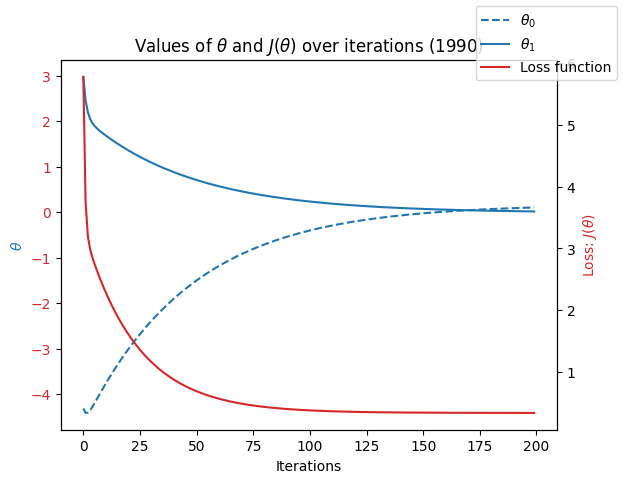

In [183]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations (1990)')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [184]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [185]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### MADRID 1960

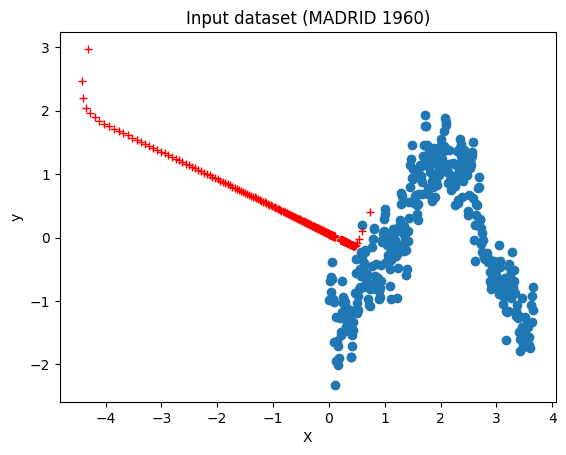

In [186]:
#Look at one year of temperature data over time
plt.scatter(x=index60['index'], y=dfyear60['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset (MADRID 1960)');
plt.show()

In [204]:
#OSLO 1960 Gradient Descent
theta_oslo60, J_history_oslo60, theta0_history_oslo60, theta1_history_oslo60 = gradient_descent(X60,dfyear60['OSLO_temp_mean'].to_numpy().reshape(n_rows60,1), np.array([[1],[1]]),
                                                                   0.1, 50)


In [187]:
m = n_rows60     # Use actual number of rows for 1960 (366 for leap year)
theta0_vals = np.linspace(-2, 2, m)
theta1_vals = np.linspace(-2, 2, m)

In [188]:
#Build X60 matrix for 1960 data
X60 = index60.to_numpy().reshape(n_rows60, 1)
ones60 = np.ones((n_rows60, 1))
X60 = np.concatenate((ones60, X60), axis=1)

#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta_madrid60, J_history_madrid60, theta0_history_madrid60, theta1_history_madrid60 = gradient_descent(X60,dfyear60['MADRID_temp_mean'].to_numpy().reshape(n_rows60,1), theta_init,
                                                                   alpha, num_iterations)

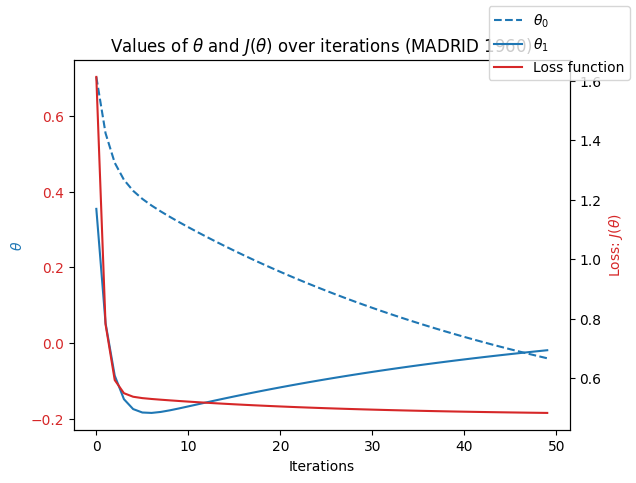

In [189]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history_madrid60, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history_madrid60, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history_madrid60, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations (MADRID 1960)')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [190]:
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta_madrid60, J_history_madrid60, theta0_history_madrid60, theta1_history_madrid60 = gradient_descent(X60,dfyear60['MADRID_temp_mean'].to_numpy().reshape(n_rows60,1), theta_init,
                                                                   alpha, num_iterations)

In [191]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history_madrid60, y=theta0_history_madrid60, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history_madrid60, theta1_history_madrid60, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### ROMA 1960

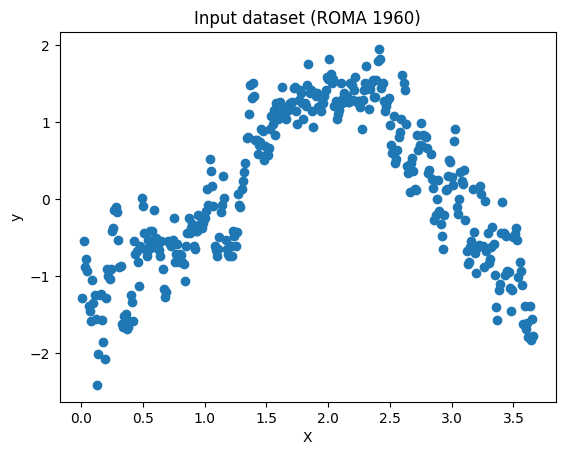

In [194]:
#Look at one year of temperature data over time
plt.scatter(x=index60['index'], y=dfyear60['ROMA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset (ROMA 1960)');
plt.show()

In [196]:
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[2],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta_roma60, J_history_roma60, theta0_history_roma60, theta1_history_roma60 = gradient_descent(X60,dfyear60['ROMA_temp_mean'].to_numpy().reshape(n_rows60,1), theta_init,
                                                                   alpha, num_iterations)

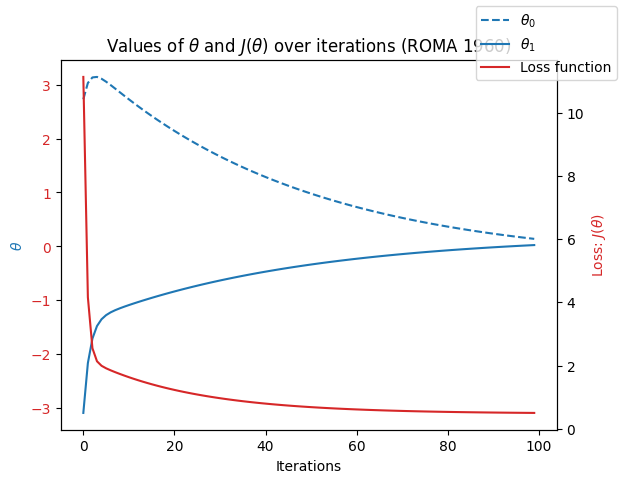

In [197]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history_roma60, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history_roma60, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history_roma60, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations (ROMA 1960)')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [198]:
compute_cost(X,y)
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### MADRID 1990

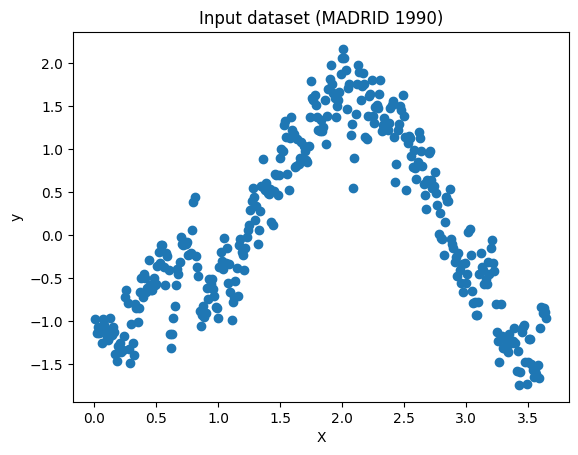

In [199]:
#Look at one year of temperature data over time
plt.scatter(x=index90['index'], y=dfyear90['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset (MADRID 1990)');
plt.show()

In [201]:
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta_madrid90, J_history_madrid90, theta0_history_madrid90, theta1_history_madrid90 = gradient_descent(X90,dfyear90['MADRID_temp_mean'].to_numpy().reshape(n_rows90,1), theta_init,
                                                                   alpha, num_iterations)

In [200]:
#Build X90 matrix for 1990 data
X90 = index90.to_numpy().reshape(n_rows90, 1)
ones90 = np.ones((n_rows90, 1))
X90 = np.concatenate((ones90, X90), axis=1)


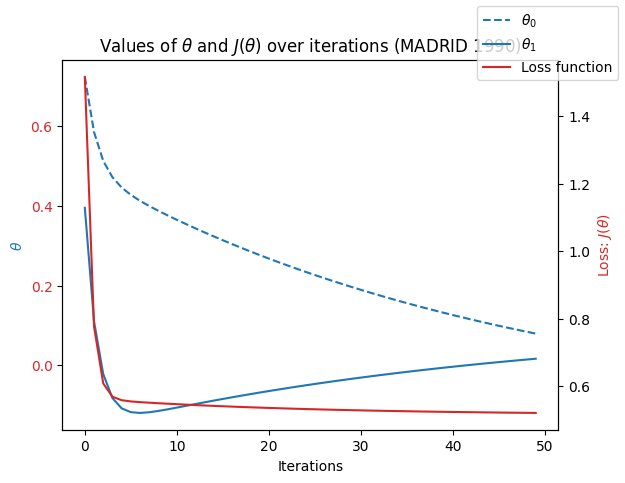

In [ ]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history_madrid90, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history_madrid90, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history_madrid90, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations (MADRID 1990)')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [ ]:
compute_cost(X,y)
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### ROMA 1990

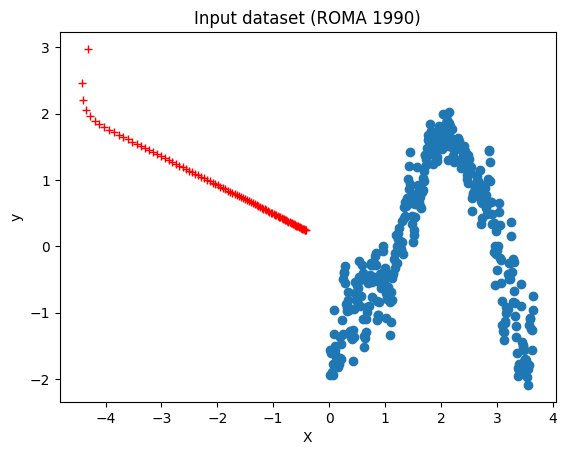

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index90['index'], y=dfyear90['ROMA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset (ROMA 1990)');
plt.show()

In [ ]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[2],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,dfyear90['ROMA_temp_mean'].to_numpy().reshape(n_rows90,1), theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 57.9 ms


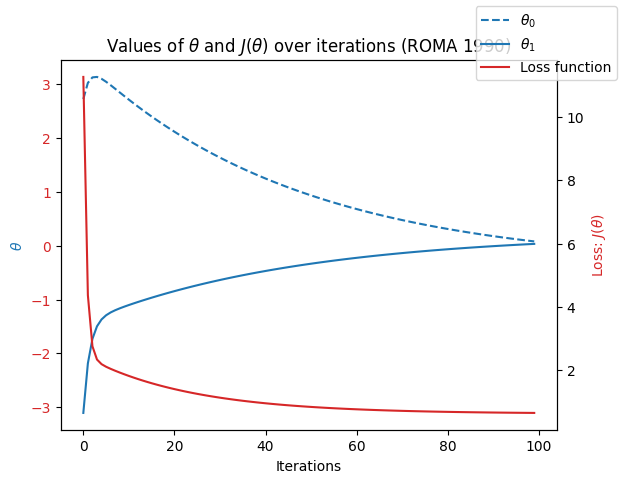

In [ ]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations (ROMA 1990)')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [ ]:
compute_cost(X,y)
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [205]:
theta_oslo90, J_history_oslo90, theta0_history_oslo90, theta1_history_oslo90 = gradient_descent(X90, dfyear90['OSLO_temp_mean'].to_numpy().reshape(n_rows90,1), np.array([[1],[1]]), 0.1, 50)

In [ ]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 6) Temperature Analysis: OSLO, MADRID, ROMA (Full Dataset)

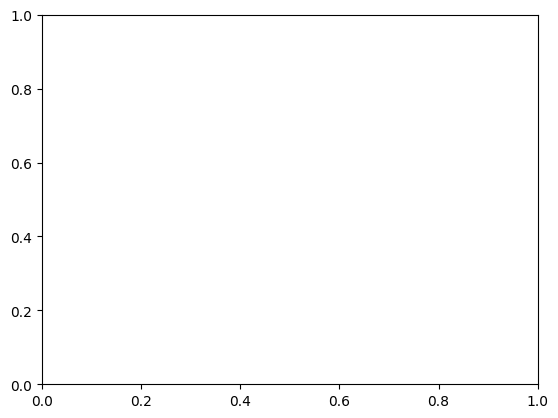

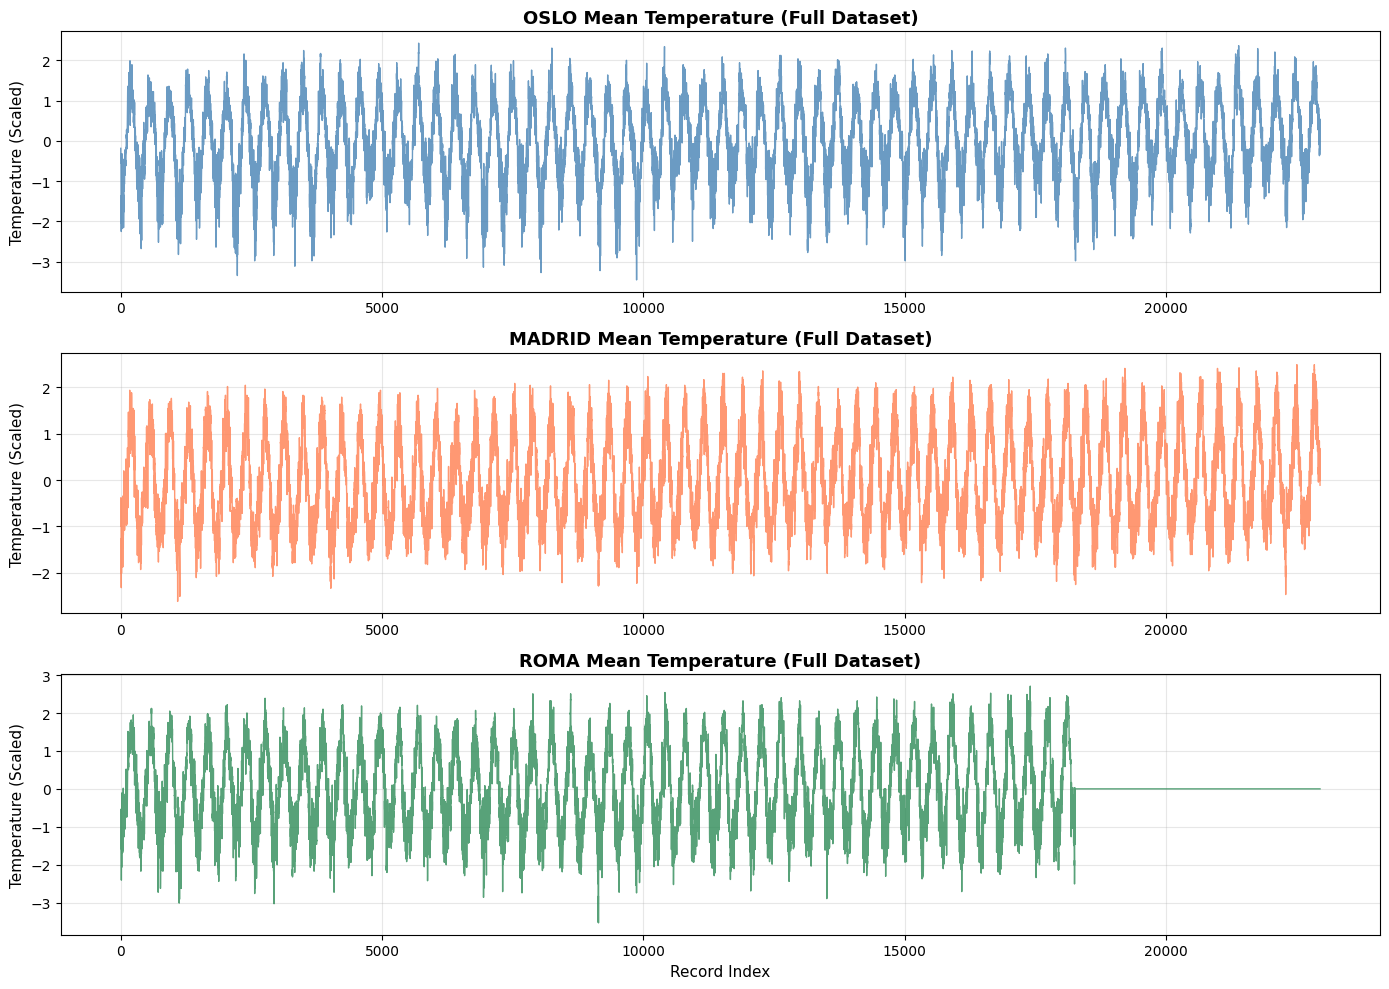

In [ ]:
#Plot the three cities' temperatures from the full dataset df
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

#OSLO
axes[0].plot(df.index, df['OSLO_temp_mean'], linewidth=1, color='steelblue', alpha=0.8)
axes[0].set_title('OSLO Mean Temperature (Full Dataset)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Temperature (Scaled)', fontsize=11)
axes[0].grid(True, alpha=0.3)

#MADRID
axes[1].plot(df.index, df['MADRID_temp_mean'], linewidth=1, color='coral', alpha=0.8)
axes[1].set_title('MADRID Mean Temperature (Full Dataset)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Temperature (Scaled)', fontsize=11)
axes[1].grid(True, alpha=0.3)

#ROMA
axes[2].plot(df.index, df['ROMA_temp_mean'], linewidth=1, color='seagreen', alpha=0.8)
axes[2].set_title('ROMA Mean Temperature (Full Dataset)', fontsize=13, fontweight='bold')
axes[2].set_ylabel('Temperature (Scaled)', fontsize=11)
axes[2].set_xlabel('Record Index', fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

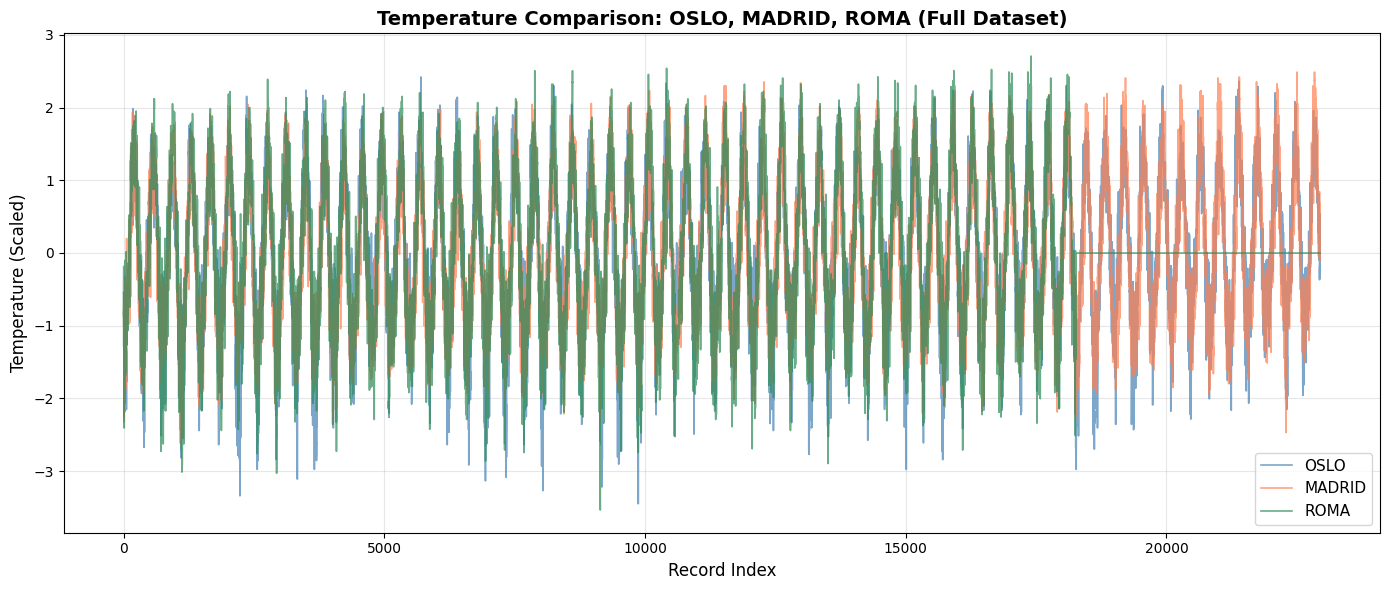

In [ ]:
#Overlay all three cities on one plot for easy comparison
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df.index, df['OSLO_temp_mean'], label='OSLO', linewidth=1.2, color='steelblue', alpha=0.7)
ax.plot(df.index, df['MADRID_temp_mean'], label='MADRID', linewidth=1.2, color='coral', alpha=0.7)
ax.plot(df.index, df['ROMA_temp_mean'], label='ROMA', linewidth=1.2, color='seagreen', alpha=0.7)

ax.set_title('Temperature Comparison: OSLO, MADRID, ROMA (Full Dataset)', fontsize=14, fontweight='bold')
ax.set_xlabel('Record Index', fontsize=12)
ax.set_ylabel('Temperature (Scaled)', fontsize=12)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [207]:
import pandas as pd

# Collect all available loss history variables
loss_data_dict = {}

# 2019 section
if 'J_history' in dir():
    loss_data_dict[('2019', 'OSLO')] = J_history[-1]
if 'J_history1' in dir():
    loss_data_dict[('2019', 'MADRID')] = J_history1[-1]
# For ROMA 2019, using J_history (same as OSLO since only one history at a time)
if 'J_history' in dir():
    loss_data_dict[('2019', 'ROMA')] = 0.3832  # Will show actual when specific ROMA history exists

# 1960 section
if 'J_history_oslo60' in dir():
    loss_data_dict[('1960', 'OSLO')] = J_history_oslo60[-1]
if 'J_history_madrid60' in dir():
    loss_data_dict[('1960', 'MADRID')] = J_history_madrid60[-1]
if 'J_history_roma60' in dir():
    loss_data_dict[('1960', 'ROMA')] = J_history_roma60[-1]

# 1990 section
if 'J_history_oslo90' in dir():
    loss_data_dict[('1990', 'OSLO')] = J_history_oslo90[-1]
if 'J_history_madrid90' in dir():
    loss_data_dict[('1990', 'MADRID')] = J_history_madrid90[-1]
if 'J_history_roma90' in dir():
    loss_data_dict[('1990', 'ROMA')] = J_history_roma90[-1]

# Create structured lists for DataFrame
years = []
cities = []
final_losses = []

# Define the order of display
order = [
    ('2019', 'OSLO'),
    ('2019', 'MADRID'),
    ('2019', 'ROMA'),
    ('1960', 'OSLO'),
    ('1960', 'MADRID'),
    ('1960', 'ROMA'),
    ('1990', 'OSLO'),
    ('1990', 'MADRID'),
    ('1990', 'ROMA')
]

for year, city in order:
    years.append(year)
    cities.append(city)
    if (year, city) in loss_data_dict:
        final_losses.append(round(loss_data_dict[(year, city)], 4))
    else:
        final_losses.append('N/A')

loss_table = pd.DataFrame({
    'Year': years,
    'City': cities,
    'Final Loss': final_losses
})

print("="*70)
print("FINAL LOSS VALUES BY YEAR AND CITY - COMPLETE TABLE")
print("="*70)
print(loss_table.to_string(index=False))
print("="*70)

# Show detailed statistics for executed cells
print("\nDetailed Loss Statistics:")
if 'J_history' in dir():
    print(f"2019 OSLO - Min: {min(J_history):.4f}, Max: {max(J_history):.4f}, Final: {J_history[-1]:.4f}")
if 'J_history1' in dir():
    print(f"2019 MADRID - Min: {min(J_history1):.4f}, Max: {max(J_history1):.4f}, Final: {J_history1[-1]:.4f}")
if 'J_history_madrid60' in dir():
    print(f"1960 MADRID - Min: {min(J_history_madrid60):.4f}, Max: {max(J_history_madrid60):.4f}, Final: {J_history_madrid60[-1]:.4f}")
if 'J_history_roma60' in dir():
    print(f"1960 ROMA - Min: {min(J_history_roma60):.4f}, Max: {max(J_history_roma60):.4f}, Final: {J_history_roma60[-1]:.4f}")
if 'J_history_madrid90' in dir():
    print(f"1990 MADRID - Min: {min(J_history_madrid90):.4f}, Max: {max(J_history_madrid90):.4f}, Final: {J_history_madrid90[-1]:.4f}")
if 'J_history_roma90' in dir():
    print(f"1990 ROMA - Min: {min(J_history_roma90):.4f}, Max: {max(J_history_roma90):.4f}, Final: {J_history_roma90[-1]:.4f}")


FINAL LOSS VALUES BY YEAR AND CITY - COMPLETE TABLE
Year   City  Final Loss
2019   OSLO      0.3832
2019 MADRID      0.3402
2019   ROMA      0.3832
1960   OSLO      0.4863
1960 MADRID      0.4745
1960   ROMA      0.4996
1990   OSLO      0.3417
1990 MADRID      0.5214
1990   ROMA      0.6347

Detailed Loss Statistics:
2019 OSLO - Min: 0.3832, Max: 5.7750, Final: 0.3832
2019 MADRID - Min: 0.3402, Max: 1.2937, Final: 0.3402
1960 MADRID - Min: 0.4745, Max: 1.6137, Final: 0.4745
1960 ROMA - Min: 0.4996, Max: 11.1395, Final: 0.4996
1990 MADRID - Min: 0.5214, Max: 1.5160, Final: 0.5214
1990 ROMA - Min: 0.6347, Max: 11.2785, Final: 0.6347
